In [1]:
%tensorflow_version 1.0.x


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.0.x`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [3]:
! pip install Flask==0.12.2 requests==2.18.4

     |████████████████████████████████| 92kB 5.1MB/s 
     |████████████████████████████████| 92kB 5.7MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 133kB 8.8MB/s 
ERROR: tensorflow-datasets 4.0.1 has requirement requests>=2.19.0, but you'll have requests 2.18.4 which is incompatible.
ERROR: pandas-datareader 0.9.0 has requirement requests>=2.19.0, but you'll have requests 2.18.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.18.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2
  Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Succes

In [4]:

class Blockchain(object):
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        
    def new_block(self):
        # Creates a new Block and adds it to the chain
        pass
    
    def new_transaction(self):
        # Adds a new transaction to the list of transactions
        pass
    
    @staticmethod
    def hash(block):
        # Hashes a Block
        pass
 
    @property
    def last_block(self):
        # Returns the last Block in the chain
        pass

In [5]:

block = {
    'index': 1,
    'timestamp': 1506057125.900785,
    'transactions': [
        {
            'sender': "8527147fe1f5426f9dd545de4b27ee00",
            'recipient': "a77f5cdfa2934df3954a5c7c7da5df1f",
            'amount': 5,
        }
    ],
    'proof': 324984774000,
    'previous_hash': "2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824"
}

In [6]:

class Blockchain(object):
    ...
    
    def new_transaction(self, sender, recipient, amount):
        """
        Creates a new transaction to go into the next mined Block
        :param sender: <str> Address of the Sender
        :param recipient: <str> Address of the Recipient
        :param amount: <int> Amount
        :return: <int> The index of the Block that will hold this transaction
        """
 
        self.current_transactions.append({
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
        })
 
        return self.last_block['index'] + 1

In [37]:
import json
from time import time
 
 
class Blockchain(object):
    def __init__(self):
        self.current_transactions = []
        self.chain = []
 
        # Create the genesis block
        self.new_block(previous_hash=1, proof=100)
 
    def new_block(self, proof, previous_hash=None):
        """
        Create a new Block in the Blockchain
        :param proof: <int> The proof given by the Proof of Work algorithm
        :param previous_hash: (Optional) <str> Hash of previous Block
        :return: <dict> New Block
        """
 
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
 
        # Reset the current list of transactions
        self.current_transactions = []
 
        self.chain.append(block)
        return block
 
    def new_transaction(self, sender, recipient, amount):
        """
        Creates a new transaction to go into the next mined Block
        :param sender: <str> Address of the Sender
        :param recipient: <str> Address of the Recipient
        :param amount: <int> Amount
        :return: <int> The index of the Block that will hold this transaction
        """
        self.current_transactions.append({
            'sender': sender,
            'recipient': recipient,
            'amount': amount,
        })
 
        return self.last_block['index'] + 1
 
    @property
    def last_block(self):
        return self.chain[-1]
 
    @staticmethod
    def hash(block):
        """
        Creates a SHA-256 hash of a Block
        :param block: <dict> Block
        :return: <str>
        """
 
        # We must make sure that the Dictionary is Ordered, or we'll have inconsistent hashes
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

پس از آنکه ()new_transaction یک تراکنش را به لیست اضافه می‌کند، اندیس بلوکی را که تراکنش به آن افزوده شده باز می‌گرداند. این کار بعدا برای کاربر جهت وارد کردن تراکنش‌ها مفید خواهد بود.

ساخت بلوک جدید
هنگامی که Blockchain نمونه‌سازی شد، نیاز به خوراک دادن به آن با یک «بلوک پیدایش» (genesis block) – یک بلوک بدون هیچ‌گونه اجدادی – است. همچنین نیاز به اضافه کردن یک «proof» به بلوک genesis است که در نتیجه کاوش (mining) (یا اثبات کارکرد | Proof of Work) به وقوع می‌پیوندد. در این رابطه بعدا بیش‌تر صحبت خواهد شد. علاوه بر ساخت بلوک genesis در سازنده، متدهایی برای ()new_block() ،new_transaction و ()hash نیاز است.



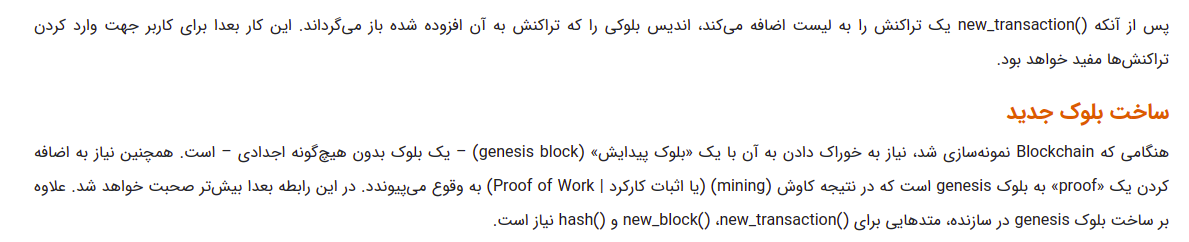

<p>الگوریتم&nbsp;Proof of Work (به اختصار PoW | اثبات کارکرد) چگونگی ساخت یا کاوش بلوک‌های جدید در بلاک چین (زنجیره بلوکی) است. هدف از&nbsp;PoW کشف عددی محسوب می‌شود که مساله را حل می‌کند. پیدا کردن این عدد&nbsp;– از جهت محاسبات کامپیوتری –&nbsp; توسط هر شخصی که در شبکه قرار دارد باید دشوار و تایید پاسخ آن باید آسان باشد.</p>

<span id="درک_الگوریتم_Proof_of_Work">درک الگوریتم&nbsp;Proof of Work</span>

<p>الگوریتم&nbsp;Proof of Work (به اختصار PoW | اثبات کارکرد) چگونگی ساخت یا کاوش بلوک‌های جدید در بلاک چین (زنجیره بلوکی) است. هدف از&nbsp;PoW کشف عددی محسوب می‌شود که مساله را حل می‌کند. پیدا کردن این عدد&nbsp;– از جهت محاسبات کامپیوتری –&nbsp; توسط هر شخصی که در شبکه قرار دارد باید دشوار و تایید پاسخ آن باید آسان باشد.</p>


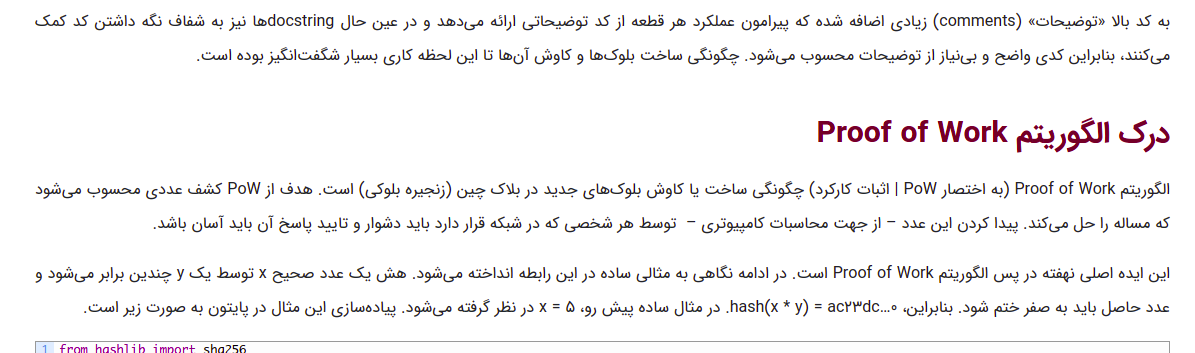

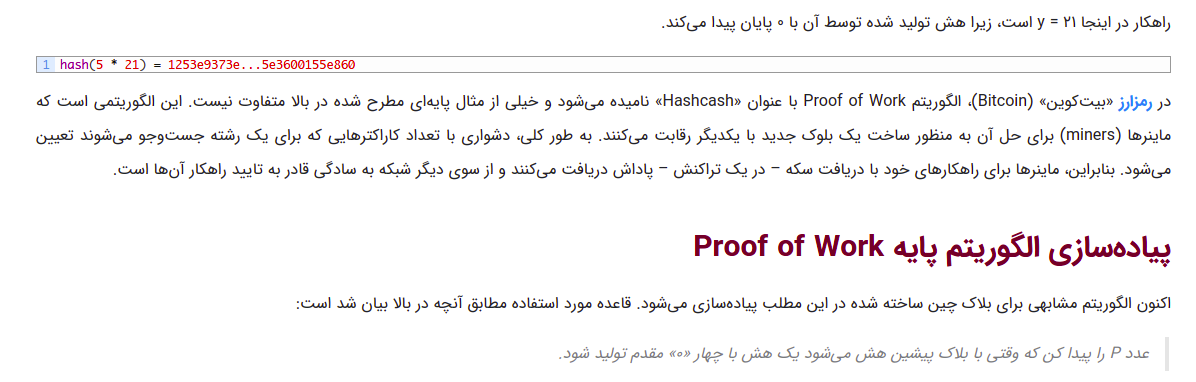

In [8]:
hash(5 * 21)#= 1253e9373e...5e3600155e860

105

In [9]:


import hashlib
import json
 
from time import time
from uuid import uuid4
 
 
class Blockchain(object):
    ...
        
    def proof_of_work(self, last_proof):
        """
        Simple Proof of Work Algorithm:
         - Find a number p' such that hash(pp') contains leading 4 zeroes, where p is the previous p'
         - p is the previous proof, and p' is the new proof
        :param last_proof: <int>
        :return: <int>
        """
 
        proof = 0
        while self.valid_proof(last_proof, proof) is False:
            proof += 1
 
        return proof
 
    @staticmethod
    def valid_proof(last_proof, proof):
        """
        Validates the Proof: Does hash(last_proof, proof) contain 4 leading zeroes?
        :param last_proof: <int> Previous Proof
        :param proof: <int> Current Proof
        :return: <bool> True if correct, False if not.
        """
 
        guess = f'{last_proof}{proof}'.encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

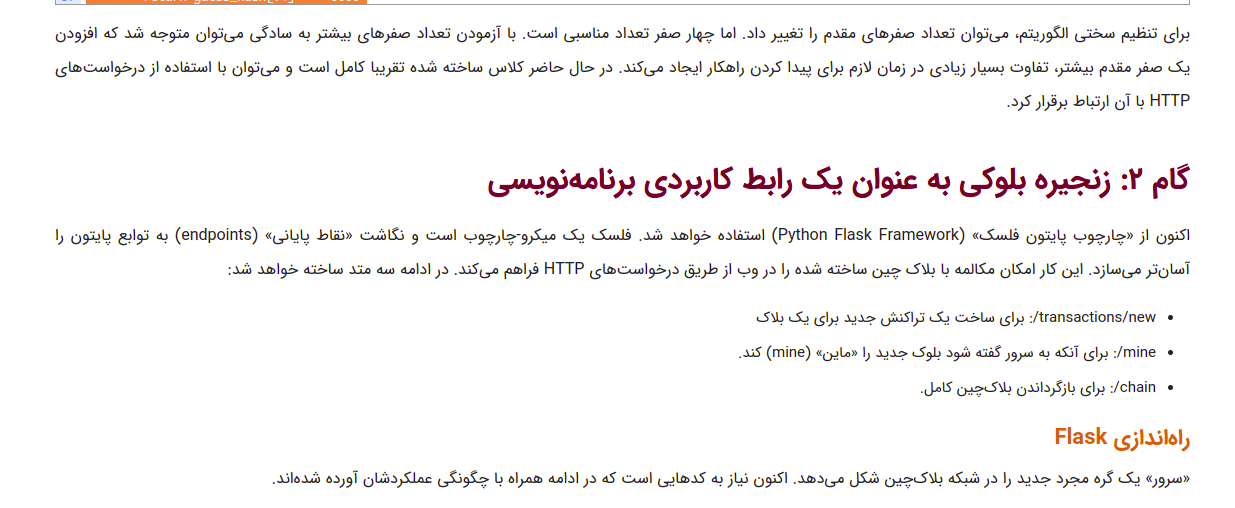

In [10]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip  -o ngrok-stable-linux-amd64.zip

get_ipython().system_raw('tensorboard --logdir /content/trainingdata/objectdetection/ckpt_output/trainingImatges/ --host 0.0.0.0 --port 5000 &')

get_ipython().system_raw('./ngrok http 5000 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
 "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2021-03-10 11:02:15--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 174.129.26.222, 3.226.107.193, 3.222.240.112, ...
Connecting to bin.equinox.io (bin.equinox.io)|174.129.26.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  13.8MB/s    in 1.0s    

2021-03-10 11:02:16 (13.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


https://colab.research.google.com/github/shawwn/colab-tricks/blob/master/ngrok-tricks.ipynb#scrollTo=jBqoQ96tf-GR

In [39]:
!pip install pyngrok --quiet
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()
Ngrok_Port="80"
Ngrok_Port_int=int(Ngrok_Port)
# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ''
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
public_url = ngrok.connect(port=Ngrok_Port, proto="http", options={"bind_tls": True})
print("Tracking URL:", public_url)

Tracking URL: NgrokTunnel: "http://055491238094.ngrok.io" -> "http://localhost:80"


In [21]:
!ps aux | grep ngrok

root          94  9.6  0.1 122768 18856 ?        Sl   11:02   0:00 ./ngrok http 5000
root         129  0.0  0.0      0     0 ?        Z    11:02   0:00 [ngrok] <defunct>
root         145  0.0  0.0  39200  6464 ?        S    11:02   0:00 /bin/bash -c ps aux | grep ngrok
root         151  0.0  0.0  38576  4996 ?        S    11:02   0:00 grep ngrok


In [ ]:
# from pyngrok import ngrok
# ngrok.kill()

# url = ngrok.connect(Ngrok_Port_int+1).public_url
# print("Tracking URL:", public_url)

In [40]:

import hashlib
import json
from textwrap import dedent
from time import time
from uuid import uuid4
 
from flask import Flask
 
 
class Blockchain(object):
    ...
 
 
# Instantiate our Node
app = Flask(__name__)
 
# Generate a globally unique address for this node
node_identifier = str(uuid4()).replace('-', '')
 
# Instantiate the Blockchain
blockchain = Blockchain()
 
 
@app.route('/mine', methods=['GET'])
def mine():
    return "We'll mine a new Block"
  
@app.route('/transactions/new', methods=['POST'])
def new_transaction():
    return "We'll add a new transaction"
 
@app.route('/chain', methods=['GET'])
def full_chain():
    response = {
        'chain': blockchain.chain,
        'length': len(blockchain.chain),
    }
    return jsonify(response), 200
 
if __name__ == '__main__':
    app.run(host='localhost', port=Ngrok_Port_int)

 * Running on http://localhost:80/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Mar/2021 11:14:05] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [10/Mar/2021 11:14:05] "GET /robots.txt HTTP/1.1" 404 -
127.0.0.1 - - [10/Mar/2021 11:14:06] "GET /favicon.ico HTTP/1.1" 404 -
[2021-03-10 11:14:06,780] ERROR in app: Exception on /chain [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 33, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1612, in full_dispatch_request
    rv = self.dispatch_request()
  File

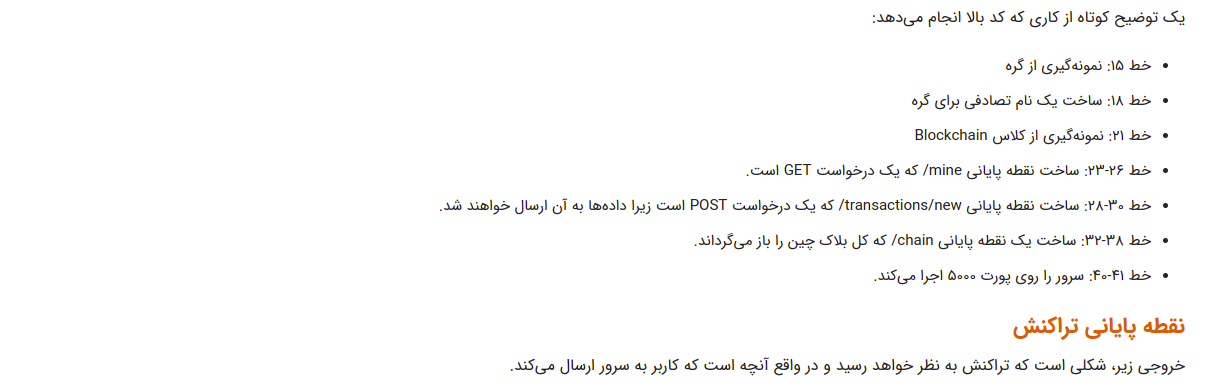

In [ ]:
{
"sender": "my address",
"recipient": "someone else's address",
"amount": 5
}

**از آنجا که در حال حاضر متد کلاس برای افزودن تراکنش به بلوک وجود دارد، ادامه کار آسان خواهد بود. کد زیر، تابع لازم برای افزودن تراکنش‌ها است:**

In [41]:

import hashlib
import json
from textwrap import dedent
from time import time
from uuid import uuid4
 
from flask import Flask, jsonify, request
 
...
 
@app.route('/transactions/new', methods=['POST'])
def new_transaction():
    values = request.get_json()
 
    # Check that the required fields are in the POST'ed data
    required = ['sender', 'recipient', 'amount']
    if not all(k in values for k in required):
        return 'Missing values', 400
 
    # Create a new Transaction
    index = blockchain.new_transaction(values['sender'], values['recipient'], values['amount'])
 
    response = {'message': f'Transaction will be added to Block {index}'}
    return jsonify(response), 201

AssertionError: ignored

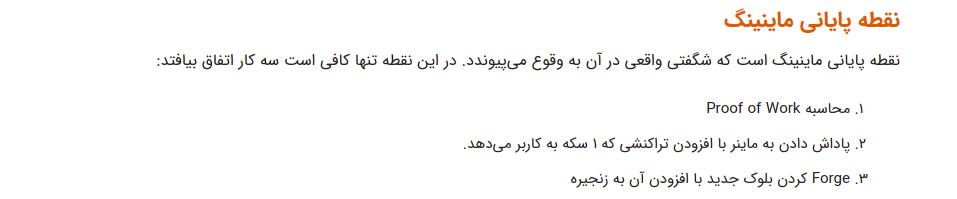

In [ ]:

import hashlib
import json
 
from time import time
from uuid import uuid4
 
from flask import Flask, jsonify, request
 
...
 
@app.route('/mine', methods=['GET'])
def mine():
    # We run the proof of work algorithm to get the next proof...
    last_block = blockchain.last_block
    last_proof = last_block['proof']
    proof = blockchain.proof_of_work(last_proof)
 
    # We must receive a reward for finding the proof.
    # The sender is "0" to signify that this node has mined a new coin.
    blockchain.new_transaction(
        sender="0",
        recipient=node_identifier,
        amount=1,
    )
 
    # Forge the new Block by adding it to the chain
    previous_hash = blockchain.hash(last_block)
    block = blockchain.new_block(proof, previous_hash)
 
    response = {
        'message': "New Block Forged",
        'index': block['index'],
        'transactions': block['transactions'],
        'proof': block['proof'],
        'previous_hash': block['previous_hash'],
    }
    return jsonify(response), 200

![image.png](
)

In [ ]:

!python blockchain.py
#Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


**اکنون برای ماین کردن یک بلوک با استفاده از درخواست GET تلاش می‌شود:**

In [ ]:
!Python
#http://localhost:5000/mine


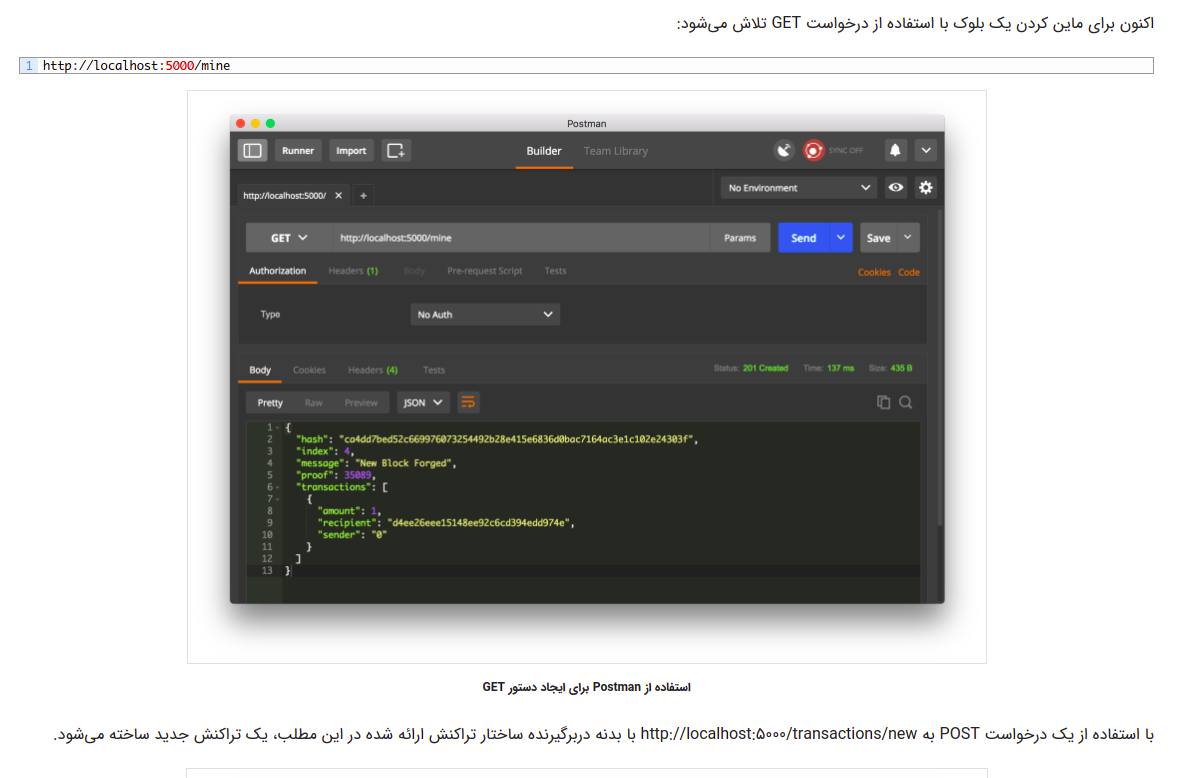

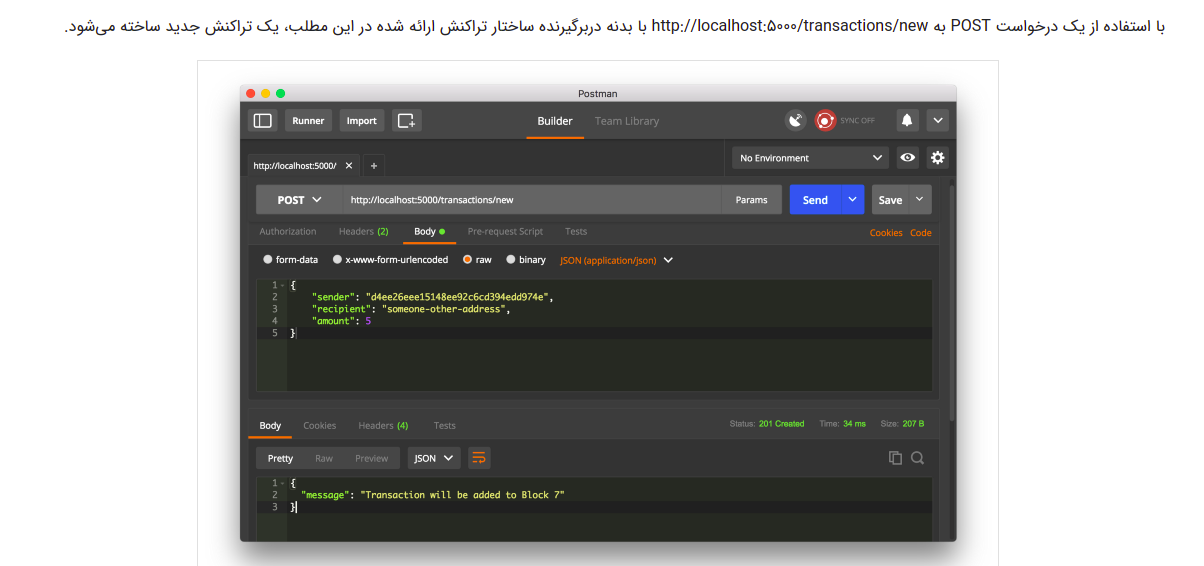

**افرادی که از Postman استفاده نمی‌کنند می‌توانند درخواست مشابهی را با استفاده از cURL انجام دهند:**

In [ ]:
%%bash

!curl -X POST -H "Content-Type: application/json" -d '{ \
"sender": "d4ee26eee15148ee92c6cd394edd974e",\
"recipient": "someone-other-address",\
"amount": 5\
}' "http://localhost:5000/transactions/new"

**سرور ریست شد و دو بلوک را ماین کرد تا ۳ تا در کل بدهد. اکنون کل زنجیره بلوک با درخواست http://localhost:5000/chain بازرسی (inspect) می‌شود:**

In [ ]:

{
"chain": [
{
"index": 1,
"previous_hash": 1,
"proof": 100,
"timestamp": 1506280650.770839,
"transactions": []
},
{
"index": 2,
"previous_hash": "c099bc...bfb7",
"proof": 35293,
"timestamp": 1506280664.717925,
"transactions": [
{
"amount": 1,
"recipient": "8bbcb347e0634905b0cac7955bae152b",
"sender": "0"
}
]
},
{
"index": 3,
"previous_hash": "eff91a...10f2",
"proof": 35089,
"timestamp": 1506280666.1086972,
"transactions": [
{
"amount": 1,
"recipient": "8bbcb347e0634905b0cac7955bae152b",
"sender": "0"
}
]
}
],
"length": 3
}

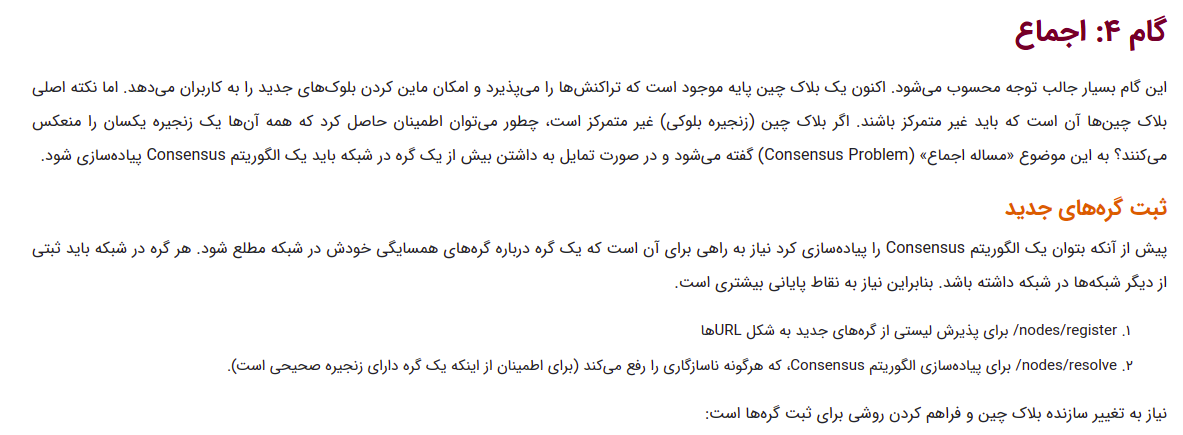

In [ ]:

from urllib.parse import urlparse
...
 
 
class Blockchain(object):
    def __init__(self):
        ...
        self.nodes = set()
        ...
 
    def register_node(self, address):
        """
        Add a new node to the list of nodes
        :param address: <str> Address of node. Eg. 'http://192.168.0.5:5000'
        :return: None
        """
 
        parsed_url = urlparse(address)
        self.nodes.add(parsed_url.netloc)

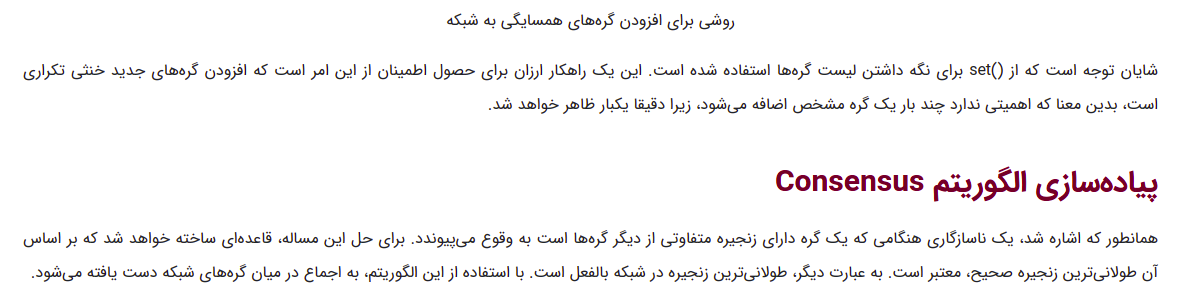

In [ ]:
import requests
 
 
class Blockchain(object)
    ...
    
    def valid_chain(self, chain):
        """
        Determine if a given blockchain is valid
        :param chain: <list> A blockchain
        :return: <bool> True if valid, False if not
        """
 
        last_block = chain[0]
        current_index = 1
 
        while current_index < len(chain):
            block = chain[current_index]
            print(f'{last_block}')
            print(f'{block}')
            print("\n-----------\n")
            # Check that the hash of the block is correct
            if block['previous_hash'] != self.hash(last_block):
                return False
 
            # Check that the Proof of Work is correct
            if not self.valid_proof(last_block['proof'], block['proof']):
                return False
 
            last_block = block
            current_index += 1
 
        return True
 
    def resolve_conflicts(self):
        """
        This is our Consensus Algorithm, it resolves conflicts
        by replacing our chain with the longest one in the network.
        :return: <bool> True if our chain was replaced, False if not
        """
 
        neighbours = self.nodes
        new_chain = None
 
        # We're only looking for chains longer than ours
        max_length = len(self.chain)
 
        # Grab and verify the chains from all the nodes in our network
        for node in neighbours:
            response = requests.get(f'http://{node}/chain')
 
            if response.status_code == 200:
                length = response.json()['length']
                chain = response.json()['chain']
 
                # Check if the length is longer and the chain is valid
                if length > max_length and self.valid_chain(chain):
                    max_length = length
                    new_chain = chain
 
        # Replace our chain if we discovered a new, valid chain longer than ours
        if new_chain:
            self.chain = new_chain
            return True
 
        return False


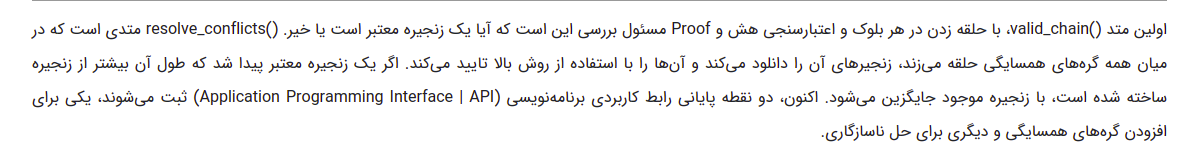

In [ ]:

@app.route('/nodes/register', methods=['POST'])
def register_nodes():
    values = request.get_json()
 
    nodes = values.get('nodes')
    if nodes is None:
        return "Error: Please supply a valid list of nodes", 400
 
    for node in nodes:
        blockchain.register_node(node)
 
    response = {
        'message': 'New nodes have been added',
        'total_nodes': list(blockchain.nodes),
    }
    return jsonify(response), 201
 
 
@app.route('/nodes/resolve', methods=['GET'])
def consensus():
    replaced = blockchain.resolve_conflicts()
 
    if replaced:
        response = {
            'message': 'Our chain was replaced',
            'new_chain': blockchain.chain
        }
    else:
        response = {
            'message': 'Our chain is authoritative',
            'chain': blockchain.chain
        }
 
    return jsonify(response), 200

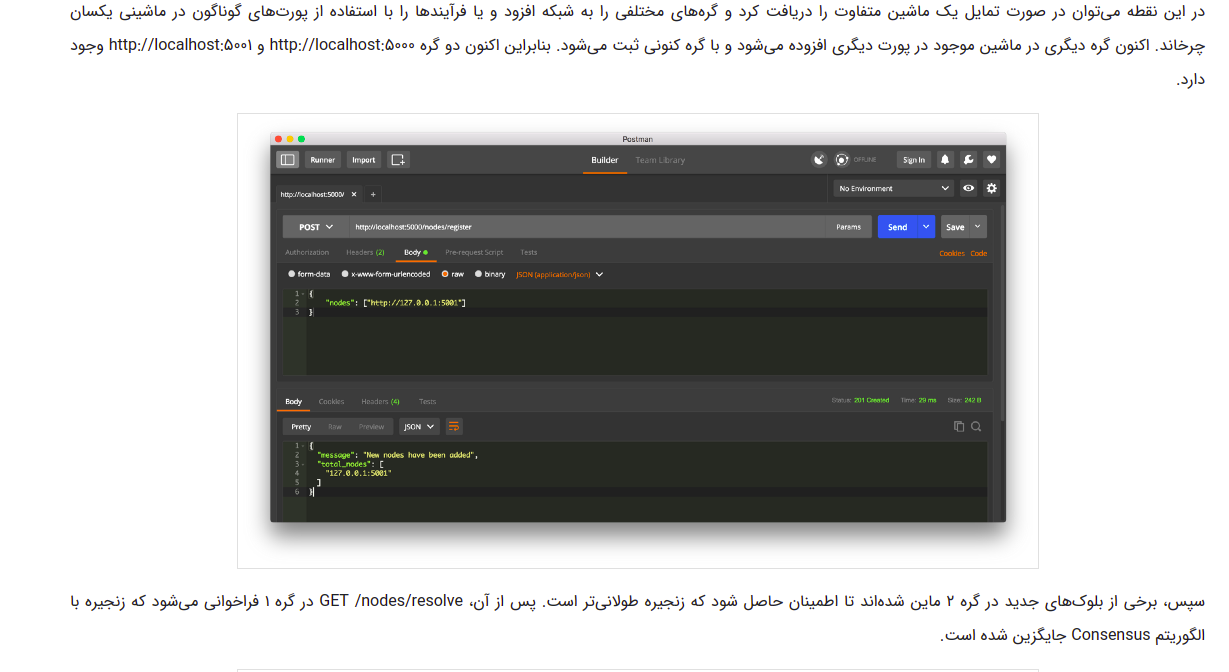

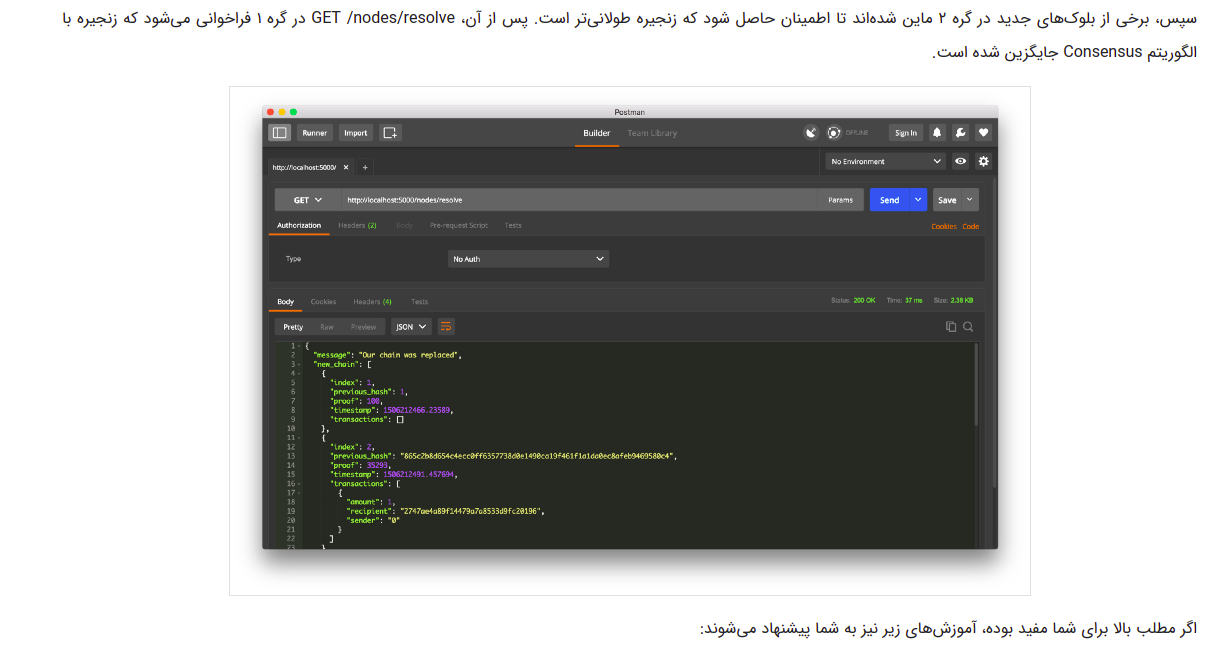

In [ ]:

from hashlib import sha256
x = 5
y = 0  # We don't know what y should be yet...
while sha256(f'{x*y}'.encode()).hexdigest()[-1] != "0":
    y += 1
print(f'The solution is y = {y}')

In [ ]:
#to get english stop words from spacy
!pip install spacy && python -m spacy download en
!pip install mglearn
!pip install wordcloud
!pip install nltk
!pip install xlrd

In [ ]:
#fetching file from google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
file = 'gdrive/My Drive/blockchain_data.xlsx'

In [ ]:
import pandas as pd #to read Excel files
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string #to remove punctuation and digits
import spacy



#creating the list of characters to be removed if present 
stopwords = list(ENGLISH_STOP_WORDS)
p = string.punctuation
d = string.digits
combined = p + d

#docs = [] #will contain text for all the companies
#company_names = [] #will contain our labels

#simple function to parse our text
def parse(txt):
    #convert everything to single case
    txt = txt.lower()
    #remove punctuation and digits
    table = str.maketrans(combined, len(combined) * " ")
    txt = txt.translate(table)
    #remove stopwords
    words = txt.split()
    cleaned_words = [w for w in words if w not in stopwords]
    cleaned_text = " ".join(cleaned_words)
    return cleaned_text


en_nlp = spacy.load('en')

#lemmentization
def normalization(txt):
    # tokenize document in spacy:
    doc_spacy = en_nlp(txt)
    # print lemmas found by spacy
    print("Lemmatization:")
    lemm_words=[token.lemma_ for token in doc_spacy]
    print(lemm_words)
    return lemm_words

In [ ]:
df = pd.read_excel(file) #read excel file of abstracts
df['AB'].dropna(inplace = True) # removing missing values
doc=[]
'''
# getting all the abstracts in a list
for rows in df['AB']:
  doc.append(rows)
'''
  
# getting all the abstracts in a list
doc = list(df['AB'])
combined_abstracts = " ".join(doc)

cleaned_abstracts = parse(combined_abstracts)# parsing abstracts to remove stop words, punctuations and turn into simillar case
cleaned_abstracts= normalization(cleaned_abstracts) #lemmatization


In [ ]:
len(cleaned_abstracts)
#len(doc)

In [ ]:
#importing countvectorizer and LDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np  # to get the LDA components
import matplotlib.pyplot as plt
import mglearn

In [ ]:
vectorizer = CountVectorizer(stop_words = 'english')
dtm = vectorizer.fit_transform(cleaned_abstracts)
num_topics = 25
multiplier = int(num_topics / 2)
lda100 = LatentDirichletAllocation(n_components=num_topics, learning_method="batch", max_iter=100, random_state=0)
document_topics100 = lda100.fit_transform(dtm)


In [ ]:
document_topics100.shape

In [ ]:
document_topics100

In [ ]:
#topics and their words
lda100.components_.shape

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vectorizer.get_feature_names())

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
num_top_words = 100

# two column bar chart:
for col in [0, 1]:
    start = col * multiplier
    end = (col + 1) * multiplier
    ax[col].barh(np.arange(multiplier), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(multiplier))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    #ax[col].set_xlim(0, 800)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()
plt.show()

In [ ]:
#sorting = np.argsort(lda100.components_, axis=1)[:, ::-1][0:num_top_words]
#mglearn.tools.print_topics(topics=range(num_topics), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=20)

In [ ]:
from sklearn import decomposition
num_topics = 25
num_top_words = 100
clf = decomposition.NMF(n_components = num_topics, random_state=1)
doctopic = clf.fit_transform(dtm) #Learn a NMF model for the data X and returns the transformed data.
topic_words = []
vocab = vectorizer.get_feature_names() 
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words] #Returns the indices that would sort an array.
    topic_words.append([vocab[i] for i in word_idx])
    
#topic_words

In [ ]:
#vectorizer.vocabulary_
text1 = list(cleaned_abstracts)
text =  ' '.join(text1)
text

In [ ]:
from wordcloud import WordCloud
#text = list(vectorizer.vocabulary_)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#import nltk
nltk.download('punkt')



In [ ]:
#wordcloud.to_file("gdrive/My Drive/blockchain_data/first_review.png")
words = nltk.word_tokenize(text)
#pass words to nltk.FreqDist
freq = nltk.FreqDist(words)
#plot the top 100 words
plt.figure(figsize=(20, 10)) 
freq.plot(100)



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params)
model.fit(dtm)

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

In [ ]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing An Optimal LDA Model")
plt.xlabel("Num of Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning_decay', loc='best')
plt.show()